#### O Objetivo desse projeto é prever a chance de uma pessoa ter um ataque cardiaco, com base em exames clinicos e de laboratório.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\walte\AppData\Local\Temp\ipykernel_19716\1226147920.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [214]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [215]:
dados =  pd.read_csv(r'C:\Users\walte\Documents\Aquivos_Walter\Python_projetos\Curso Machine Learning com python\Classificação\heart.csv' , sep =',' , encoding = 'iso-8859-1' )

In [216]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [217]:
dados.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [218]:
dados.shape

(918, 12)

In [219]:
dados.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

#### Exploração e análise

In [220]:
dados['Age'].value_counts(),

(54    51
 58    42
 55    41
 56    38
 57    38
 52    36
 51    35
 59    35
 62    35
 53    33
 60    32
 48    31
 61    31
 63    30
 50    25
 46    24
 41    24
 43    24
 64    22
 65    21
 49    21
 47    19
 44    19
 42    18
 45    18
 38    16
 67    15
 39    15
 66    13
 69    13
 40    13
 35    11
 37    11
 68    10
 34     7
 74     7
 70     7
 36     6
 71     5
 32     5
 72     4
 29     3
 75     3
 33     2
 77     2
 76     2
 31     2
 30     1
 28     1
 73     1
 Name: Age, dtype: int64,)

In [221]:
dados['Age'].value_counts().sort_index()

28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: Age, dtype: int64

In [222]:
import plotly.express as px

In [223]:
hist1 = px.histogram(dados, x = 'Age' ,nbins=60)
hist1.update_layout(width = 800 , height = 500 , title_text = "Distribuição por idades")
hist1.show()

In [224]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Count'>

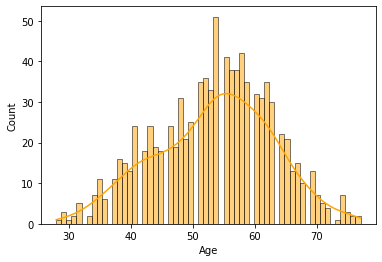

In [225]:
sns.histplot(dados, x = 'Age' , bins = 60 , color = "orange" , kde= True , stat = "count")

In [226]:
dados['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

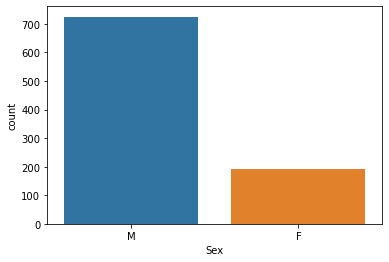

In [227]:
sns.countplot(x='Sex' , data = dados);

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

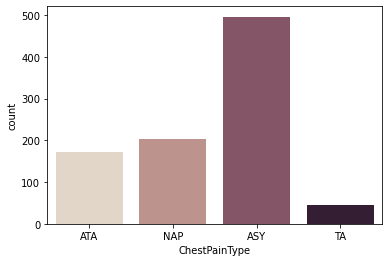

In [228]:
sns.countplot(x='ChestPainType' , data = dados , palette="ch:.25" )
dados['ChestPainType'].value_counts()

### Analisando pressão sanguinea

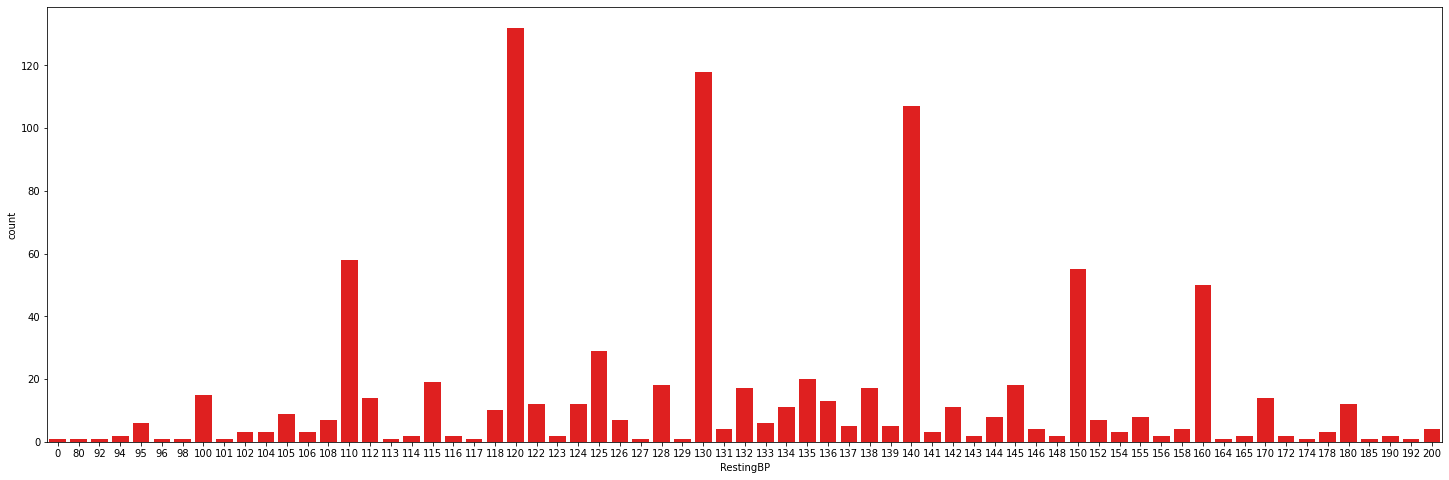

In [229]:
### Pressão sanguinea com valor de zero é um erro, deve ser tratado
ax = sns.countplot(x='RestingBP' , data = dados , color = 'red')
ax.figure.set_size_inches(25, 8)

<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

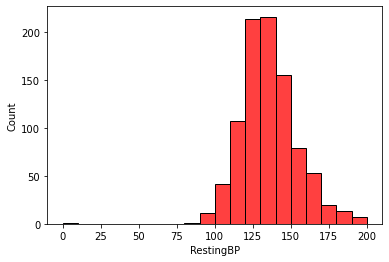

In [230]:
sns.histplot(dados, x = 'RestingBP' , bins = 20, color = "red" , stat = "count")

### Analisando Colesterol

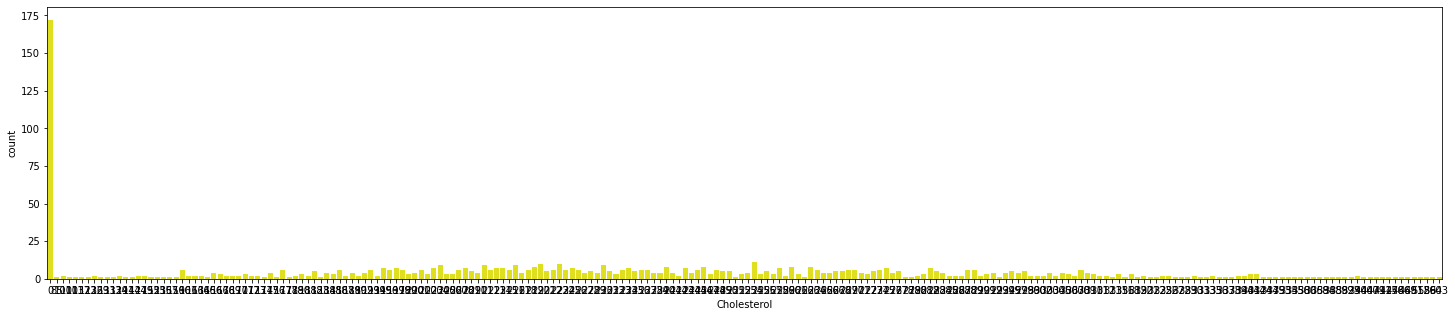

In [231]:
ax = sns.countplot(x='Cholesterol' , data = dados , color = 'yellow')
ax.figure.set_size_inches(25, 5)

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

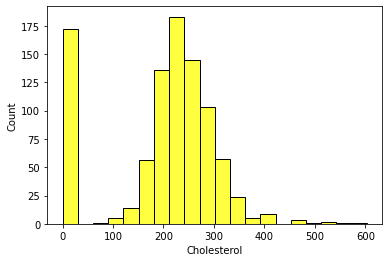

In [232]:
sns.histplot(dados, x = 'Cholesterol' , bins = 20, color = "yellow" , stat = "count")

### Analisando açucar no sangue (0 - Normal , 1 -  Diabético)

In [233]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


0    704
1    214
Name: FastingBS, dtype: int64

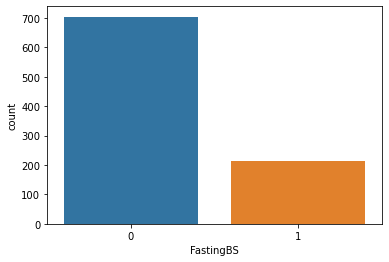

In [234]:
sns.countplot(x='FastingBS' , data = dados , )
dados['FastingBS'].value_counts()

### Analisando Eletrocardiograma - ECG

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

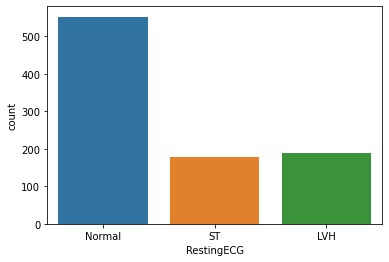

In [235]:
sns.countplot(x='RestingECG' , data = dados , )
dados['RestingECG'].value_counts()


### Analisando MaxHR Batimentos Cardiacos

In [236]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [237]:
dados['MaxHR' ].value_counts().sort_index()

60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: MaxHR, Length: 119, dtype: int64

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

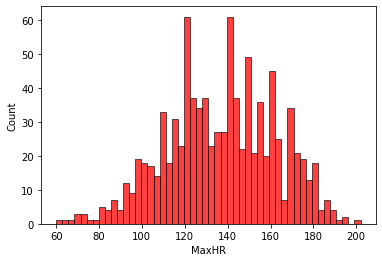

In [238]:
sns.histplot(dados, x = 'MaxHR' , bins = 50, color = "red" , stat = "count")

### Analisando ExerciseAngina - Angina induzida por exercícios

N    547
Y    371
Name: ExerciseAngina, dtype: int64

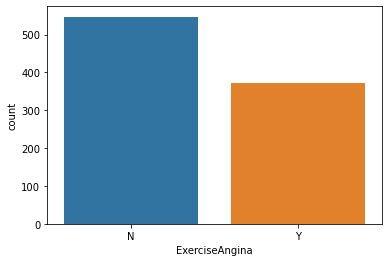

In [239]:
sns.countplot(x='ExerciseAngina' , data = dados , )
dados['ExerciseAngina'].value_counts()

In [240]:
px.pie(dados, 'ExerciseAngina')

### Analisando Oldpeak - Depressão de ST referente ao Eletro


In [241]:
dados.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<AxesSubplot:xlabel='Oldpeak', ylabel='Count'>

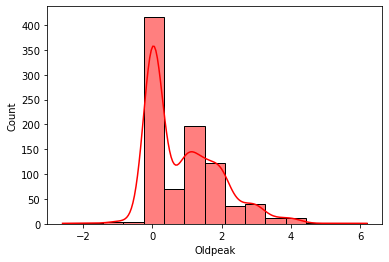

In [242]:
sns.histplot(dados, x = 'Oldpeak' , bins = 15, color = "red" , kde = True, stat = "count")

### Analisando ST_Slope

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

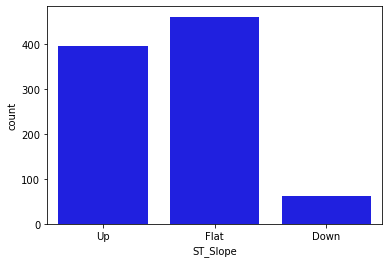

In [243]:
sns.countplot(x='ST_Slope' , data = dados , color = 'blue')
dados['ST_Slope'].value_counts()

### Analisando HeartDisease

1    508
0    410
Name: HeartDisease, dtype: int64

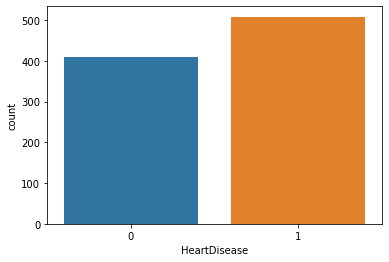

In [244]:
sns.countplot(x='HeartDisease' , data = dados )
dados['HeartDisease'].value_counts()

In [245]:
px.pie(dados, 'HeartDisease' )

### Tratamento de dados

#### Analise dos tipos de atributos

In [246]:
dados.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### VALORES MISSSING (NAN)

In [247]:
### QUantidade de valores NAN
dados.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [248]:
###Para excluir valores faltantes NAN
dados2 = dados.dropna()

In [249]:
dados2.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [250]:
### Substituir valores faltantes pela média
dados2['Age'].fillna(dados2['Age'].mean() , inplace = True)

In [251]:
### Substituir valores faltantes por qualquer outro valor
dados2['Age'].fillna(10 , inplace = True)

### Análises Estatísticas Descritivas

In [252]:
dados.describe() ### Percebe uma distribuição normal (media proximo da mediana)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [253]:
dados.mode() #moda

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


### Tratando valores incoerentes 

#### Excluindo registros com pressão 0

In [254]:
dados2 =  dados.loc[dados2.RestingBP != 0 ]

In [255]:
dados2.shape

(917, 12)

In [256]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Substituindo valores de colesteou 0 pela média sem valores 0 incluidos

In [257]:
dados2.Cholesterol.mean()

199.0163576881134

In [258]:
dados2['Cholesterol'].value_counts() ### 171 pessoas com colesterou 0, muitod dados para apagar

0      171
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [259]:
dados2.Cholesterol.replace( 0 , np.NaN , inplace = True) ### O valor NaN não entra na média

C:\Users\walte\AppData\Local\Temp\ipykernel_9488\3051363564.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [260]:
dados2.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [261]:
media_colesterou = dados2.Cholesterol.mean()
media_colesterou

244.6353887399464

In [262]:
dados2.Cholesterol.replace(np.NaN , media_colesterou , inplace = True)

C:\Users\walte\AppData\Local\Temp\ipykernel_9488\4149701057.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [263]:
dados2.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [264]:
dados2['Cholesterol'].value_counts()

244.635389    171
254.000000     11
223.000000     10
220.000000     10
230.000000      9
             ... 
392.000000      1
316.000000      1
153.000000      1
466.000000      1
131.000000      1
Name: Cholesterol, Length: 222, dtype: int64

In [265]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

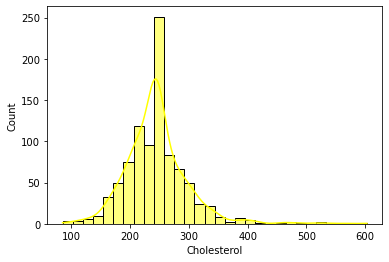

In [266]:
sns.histplot(dados2['Cholesterol'] , bins = 30 , color= 'Yellow' , kde = True , stat = 'count')

### Verificando Outliers (para esse caso vai ser mantido os outliers)

In [267]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [268]:
px.box(dados2 ,  y = 'Age')

In [269]:
px.box(dados2 ,  y = 'RestingBP')

In [270]:
px.box(dados2 ,  y = 'Cholesterol')

In [271]:
px.box(dados2 ,  y = 'MaxHR')

In [272]:
px.box(dados2 ,  y = 'Oldpeak')

In [273]:
px.box(dados2 ,  y = 'HeartDisease')

## Pré Processamento dos dados

In [274]:
dados2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [275]:
dados_df = pd.DataFrame.copy(dados2)

In [276]:
dados_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


### Tranformando as variáveis categótivas nominais em variavies categorias ordinais 

In [277]:
### Manualmente
dados_df['Sex'].replace({'M':0, 'F': 1}, inplace=True)
dados_df['ChestPainType'].replace({'TA':0, 'ATA': 1, 'NAP':2, 'ASY': 3}, inplace=True)
dados_df['RestingECG'].replace({'Normal':0, 'ST': 1, 'LVH':2}, inplace=True)
dados_df['ExerciseAngina'].replace({'N':0, 'Y': 1}, inplace=True)
dados_df['ST_Slope'].replace({'Up':0, 'Flat': 1, 'Down':2}, inplace=True)

In [278]:
dados_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289.0,0,0,172,0,0.0,0,0
1,49,1,2,160,180.0,0,0,156,0,1.0,1,1
2,37,0,1,130,283.0,0,1,98,0,0.0,0,0
3,48,1,3,138,214.0,0,0,108,1,1.5,1,1
4,54,0,2,150,195.0,0,0,122,0,0.0,0,0


In [279]:
dados_df.shape

(917, 12)

### Legenda dos dados
Age = idade (anos)

Sex = sexo (0=M; 1=F)

Chest Pain Type = tipo de dor no peito (0=TA:angina típica; 1=ATA:angina atípica; 2=NAP:dor não anginosa; 3=ASY:assintomático)

Resting BP = pressão sanguínea em repouso (mmHg)

Cholesterol = colesterol sérico (mg/dl)

Fasting BS = açúcar no sangue em jejum (mg/dl) 0: Fasting BS < 120 mg/dl (não diabético) 1: Fasting BS >= 120 mg/dl, (diabético)

Resting ECG = eletrocardiograma em repouso (0=Normal; 1=ST:Anormalidade da onda ST-T; 2=LVH: Hipertrofia ventricular esquerda)

Max HR = frequência cardíaca máxima

Exercise Angina = Angina induzida por exercício (0=Não; 1=Sim)

Old Peak = Depressão de ST induzida por exercício em relação ao repouso

ST_Slope = Inclinação do segmento ST (0=UP; 1=Flat; 2=Down)

Heart Disease = Doença cardíaca (0=Não possui doença cardíaca; 1=Possui doença cardíaca)

## Atributos Previsores e Alvo

In [280]:
dados_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289.0,0,0,172,0,0.0,0,0
1,49,1,2,160,180.0,0,0,156,0,1.0,1,1
2,37,0,1,130,283.0,0,1,98,0,0.0,0,0
3,48,1,3,138,214.0,0,0,108,1,1.5,1,1
4,54,0,2,150,195.0,0,0,122,0,0.0,0,0


In [281]:
### formato numpy array matriz
previsores = dados_df.iloc[: ,0:11].values
print(previsores)

[[40.   0.   1.  ...  0.   0.   0. ]
 [49.   1.   2.  ...  0.   1.   1. ]
 [37.   0.   1.  ...  0.   0.   0. ]
 ...
 [57.   0.   3.  ...  1.   1.2  1. ]
 [57.   1.   1.  ...  0.   0.   1. ]
 [38.   0.   2.  ...  0.   0.   0. ]]


In [282]:
previsores.shape

(917, 11)

In [283]:
alvo = dados_df.iloc[: ,11].values
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [284]:
alvo.shape

(917,)

### Análise das escalas dos atributos (Escalonamento)

In [285]:
dados_df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,53.509269,0.210469,2.251908,132.540894,244.635389,0.233370,0.604144,136.789531,0.404580,0.886696,0.63795,0.552890
std,9.437636,0.407864,0.931502,17.999749,53.347125,0.423206,0.806161,25.467129,0.491078,1.066960,0.60727,0.497466
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,214.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.00000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,244.635389,0.000000,0.000000,138.000000,0.000000,0.600000,1.00000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.00000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,1.000000


In [286]:
### Padronizar utilizando a média e o desvio padrão
from sklearn.preprocessing import StandardScaler

In [287]:
### Realizando padronização dos dados 
### Desvio padrão proximo de 1 e média próximo de 0
previsores_esc = StandardScaler().fit_transform(previsores)
previsores_esc

array([[-1.43220634, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -1.05109458],
       [-0.47805725,  1.9368261 , -0.27058012, ..., -0.82431012,
         0.10625149,  0.59651863],
       [-1.75025603, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -1.05109458],
       ...,
       [ 0.37007527, -0.51630861,  0.80354095, ...,  1.21313565,
         0.29380223,  0.59651863],
       [ 0.37007527,  1.9368261 , -1.34470119, ..., -0.82431012,
        -0.83150225,  0.59651863],
       [-1.64423947, -0.51630861, -0.27058012, ..., -0.82431012,
        -0.83150225, -1.05109458]])

In [288]:
### Tranformando o numpy array em dataframe pandas
previsores_df = pd.DataFrame(previsores_esc)
previsores_df

,0,1,2,3,4,5,6,7,8,9,10
0,-1.432206,-0.516309,-1.344701,0.414627,0.832075,-0.551733,-0.749818,1.383339,-0.824310,-0.831502,-1.051095
1,-0.478057,1.936826,-0.270580,1.526360,-1.212261,-0.551733,-0.749818,0.754736,-0.824310,0.106251,0.596519
2,-1.750256,-0.516309,-1.344701,-0.141240,0.719543,-0.551733,0.491306,-1.523953,-0.824310,-0.831502,-1.051095
3,-0.584074,1.936826,0.803541,0.303453,-0.574578,-0.551733,-0.749818,-1.131075,1.213136,0.575128,0.596519
4,0.052026,-0.516309,-0.270580,0.970493,-0.930931,-0.551733,-0.749818,-0.581047,-0.824310,-0.831502,-1.051095
...,...,...,...,...,...,...,...,...,...,...,...
912,-0.902124,-0.516309,-2.418822,-1.252973,0.363191,-0.551733,-0.749818,-0.188170,-0.824310,0.293802,0.596519
913,1.536257,-0.516309,0.803541,0.636973,-0.968441,1.812470,-0.749818,0.165420,-0.824310,2.356860,0.596519
914,0.370075,-0.516309,0.803541,-0.141240,-2.131275,-0.551733,-0.749818,-0.856061,1.213136,0.293802,0.596519
915,0.370075,1.936826,-1.344701,-0.141240,-0.161960,-0.551733,1.732430,1.461915,-0.824310,-0.831502,0.596519


## Codificando variáveis categoricas 

### LabelEncoder

In [289]:
from sklearn.preprocessing import LabelEncoder

In [290]:
dados_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289.0,0,0,172,0,0.0,0,0
1,49,1,2,160,180.0,0,0,156,0,1.0,1,1
2,37,0,1,130,283.0,0,1,98,0,0.0,0,0
3,48,1,3,138,214.0,0,0,108,1,1.5,1,1
4,54,0,2,150,195.0,0,0,122,0,0.0,0,0


In [291]:
dados_df.shape

(917, 12)

In [292]:
previsores2 = dados_df.iloc[: , 0:11].values
previsores2

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [293]:
### Pegando coluna de indice 1 (coluna de sexo)
previsores2[:,1] = LabelEncoder().fit_transform(previsores2[: ,1])
previsores2

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [294]:
### Tranformando demais colunas categoricas
previsores2[:,2] = LabelEncoder().fit_transform(previsores2[: ,2])
previsores2[:,6] = LabelEncoder().fit_transform(previsores2[: ,6])
previsores2[:,8] = LabelEncoder().fit_transform(previsores2[: ,8])
previsores2[:,10] = LabelEncoder().fit_transform(previsores2[: ,10])


In [295]:
previsores2

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [296]:
previsores2.shape

(917, 11)

In [297]:
previsores2_df = pd.DataFrame(previsores2)
previsores2_df

,0,1,2,3,4,5,6,7,8,9,10
0,40.0,0.0,1.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,1.0,2.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,0.0,1.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,1.0,3.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,1.0
4,54.0,0.0,2.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
912,45.0,0.0,0.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,1.0
913,68.0,0.0,3.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,1.0
914,57.0,0.0,3.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,1.0
915,57.0,1.0,1.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,1.0


### OneHotEncoder: Criar variáveis Dummy

#### Cuidado com a Multicolinearidade (Variáveis muito correlacionadas entre si)

In [298]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Parâmetros ColumnTransformer
- name: nome dado a transformação.
- transformer: tipo de estimador (OneHotEncoder).
- columns: colunas que serão transformadas.
- remainder: o que acontecerá com o restante das colunas não relacionadas: 
1) drop = exclui as outras colunas.
2) passthrough = mantém as outras colunas. drop é default.  
- sparse_threshold: parâmetro de classificação de matrizes esparsas. default é 0.3
- n_jobs: número de trabalhos a serem executados em paralelo. default é nenhum
- transformer_weights: definição de pesos aos transformadores.
-verbose: default é False. se for True a execução é apresentada na tela.

In [299]:
previsores3 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])],
                                remainder='passthrough').fit_transform(previsores2)
previsores3

array([[  1. ,   0. ,   0. , ...,   0. , 172. ,   0. ],
       [  0. ,   1. ,   0. , ...,   0. , 156. ,   1. ],
       [  1. ,   0. ,   0. , ...,   0. ,  98. ,   0. ],
       ...,
       [  1. ,   0. ,   0. , ...,   0. , 115. ,   1.2],
       [  0. ,   1. ,   0. , ...,   0. , 174. ,   0. ],
       [  1. ,   0. ,   0. , ...,   0. , 173. ,   0. ]])

In [300]:
previsores3.shape

(917, 20)

In [301]:
previsores3_df = pd.DataFrame(previsores3)
previsores3_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,40.0,140.0,289.0,0.0,172.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,37.0,130.0,283.0,0.0,98.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,54.0,150.0,195.0,0.0,122.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,45.0,110.0,264.0,0.0,132.0,1.2
913,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,68.0,144.0,193.0,1.0,141.0,3.4
914,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,57.0,130.0,131.0,0.0,115.0,1.2
915,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,57.0,130.0,236.0,0.0,174.0,0.0


In [302]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Escalonamento

In [303]:
### Realizando padronização dos dados 
### Desvio padrão proximo de 1 e média próximo de 0
previsores3_esc = StandardScaler().fit_transform(previsores)
previsores3_esc

array([[-1.43220634, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -1.05109458],
       [-0.47805725,  1.9368261 , -0.27058012, ..., -0.82431012,
         0.10625149,  0.59651863],
       [-1.75025603, -0.51630861, -1.34470119, ..., -0.82431012,
        -0.83150225, -1.05109458],
       ...,
       [ 0.37007527, -0.51630861,  0.80354095, ...,  1.21313565,
         0.29380223,  0.59651863],
       [ 0.37007527,  1.9368261 , -1.34470119, ..., -0.82431012,
        -0.83150225,  0.59651863],
       [-1.64423947, -0.51630861, -0.27058012, ..., -0.82431012,
        -0.83150225, -1.05109458]])

In [304]:
previsores3_df = pd.DataFrame(previsores3_esc)
previsores3_df

,0,1,2,3,4,5,6,7,8,9,10
0,-1.432206,-0.516309,-1.344701,0.414627,0.832075,-0.551733,-0.749818,1.383339,-0.824310,-0.831502,-1.051095
1,-0.478057,1.936826,-0.270580,1.526360,-1.212261,-0.551733,-0.749818,0.754736,-0.824310,0.106251,0.596519
2,-1.750256,-0.516309,-1.344701,-0.141240,0.719543,-0.551733,0.491306,-1.523953,-0.824310,-0.831502,-1.051095
3,-0.584074,1.936826,0.803541,0.303453,-0.574578,-0.551733,-0.749818,-1.131075,1.213136,0.575128,0.596519
4,0.052026,-0.516309,-0.270580,0.970493,-0.930931,-0.551733,-0.749818,-0.581047,-0.824310,-0.831502,-1.051095
...,...,...,...,...,...,...,...,...,...,...,...
912,-0.902124,-0.516309,-2.418822,-1.252973,0.363191,-0.551733,-0.749818,-0.188170,-0.824310,0.293802,0.596519
913,1.536257,-0.516309,0.803541,0.636973,-0.968441,1.812470,-0.749818,0.165420,-0.824310,2.356860,0.596519
914,0.370075,-0.516309,0.803541,-0.141240,-2.131275,-0.551733,-0.749818,-0.856061,1.213136,0.293802,0.596519
915,0.370075,1.936826,-1.344701,-0.141240,-0.161960,-0.551733,1.732430,1.461915,-0.824310,-0.831502,0.596519


In [305]:
previsores3_df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.025231e-15,3.099423e-17,6.552979e-16,7.554844e-16,-1.929875e-16,-2.808852e-17,1.954089e-16,-4.881591e-16,1.280933e-16,1.217976e-16,4.770206e-17
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-2.704405e+00,-5.163086e-01,-2.418822e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-7.498176e-01,-3.016886e+00,-8.243101e-01,-3.269662e+00,-1.051095e+00
25%,-6.900904e-01,-5.163086e-01,-2.705801e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-7.498176e-01,-6.596226e-01,-8.243101e-01,-8.315022e-01,-1.051095e+00
50%,5.202558e-02,-5.163086e-01,8.035410e-01,-1.412398e-01,0.000000e+00,-5.517333e-01,-7.498176e-01,4.755658e-02,-8.243101e-01,-2.688500e-01,5.965186e-01
75%,6.881250e-01,-5.163086e-01,8.035410e-01,4.146267e-01,4.194568e-01,-5.517333e-01,4.913064e-01,7.547357e-01,1.213136e+00,5.751284e-01,5.965186e-01
max,2.490407e+00,1.936826e+00,8.035410e-01,3.749826e+00,6.721265e+00,1.812470e+00,1.732430e+00,2.561971e+00,1.213136e+00,4.982571e+00,2.244132e+00


### Resumo do pré processamento
alvo = variável que se pretende atingir (tem ou não doença cardíaca).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

previsores2 = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas pelo labelencoder.

previsores3 = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder, sem escalonar.

previsores3_esc = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder escalonada

## Redução de dimensionalidade
Não será usada, apenas para demonstração

### Análise dos componentes principais (PCA)
**Seleção de características:** seleciona os melhores atributos e utiliza sem transformações.

**Extração de Características:** Encontra os relacionamentos dos melhores atributos e cria novos atributos.

É um algoritmo de aprendizagem não supervisionada.

Aplica-se em dados linearmente separáveis(dividindo por uma linha ou um plano).

In [306]:
from sklearn.decomposition import PCA

In [307]:
pca = PCA(n_components = 4)

In [308]:
### Tranformar base que já está em variaveis numericas
previsores_pca = pca.fit_transform(previsores2)

In [309]:
## Agora 4 dimensões
previsores_pca

array([[  44.01031323,  -36.16368188,   10.64655418,   -9.4858855 ],
       [ -63.99070205,  -13.9285156 ,   31.68531903,   -5.3197523 ],
       [  38.53828121,   33.89882653,  -12.48258193,  -21.52677046],
       ...,
       [-113.34768547,   23.48739283,   -2.51236375,    1.14310997],
       [  -9.11479572,  -35.9101508 ,    4.82792119,    9.14499845],
       [ -70.01231135,  -35.67713061,   12.10297998,  -10.53005398]])

In [310]:
### Importancia das variaveis para o modelo
pca.explained_variance_ratio_

array([0.72844082, 0.1718306 , 0.08121793, 0.01767869])

In [311]:
### O modelo explica 99,97 % do que oa 11 atributos originais explicavam.
pca.explained_variance_ratio_.sum()

0.9991680439746078

### Kernel PCA
É um algoritimo de aprendizagem supervisionada 

Aplica-se também para dados linearmente não separáveis

In [312]:
from sklearn.decomposition import KernelPCA

In [313]:
kpca = KernelPCA(n_components = 4 , kernel = 'rbf')

In [314]:
previsores_kernel = kpca.fit_transform(previsores2)

In [315]:
previsores_kernel

array([[-0.00161313, -0.00266007, -0.00186814, -0.00263223],
       [-0.00161382, -0.00266122, -0.00186901, -0.00263352],
       [-0.0016132 , -0.00266017, -0.00186822, -0.00263235],
       ...,
       [-0.00161315, -0.00266009, -0.00186816, -0.00263225],
       [-0.00161325, -0.00266026, -0.00186829, -0.00263245],
       [-0.00161314, -0.00266007, -0.00186814, -0.00263224]])

In [316]:
previsores_kernel.shape

(917, 4)

### Análise do Discriminante Linear (LDA: Linear Discriminant Analysis)

Algoritmo de aprendizagem supervisionada, pois utiliza a classe como referência para seleção.

Aplicado em situações com muitos atributos previsores e também com o atributo alvo com muitas classes.

In [317]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)

In [318]:
#previsores_lda = lda.fit_transform(previsores2, alvo)

In [319]:
#previsores_lda

In [320]:
#lda.explained_variance_ratio_

### Salvando variáveis 

In [321]:
import pickle

In [322]:
# Criando arquivo
arq1 = open('heart.pkl', 'wb')

In [323]:
# Salvando a variável no arquivo
pickle.dump(alvo, arq1)

In [324]:
# Fechando arquivo
arq1.close()

In [325]:
# Lendo arquivo
arq1 = open('heart.pkl', 'rb')

In [326]:
# Chamando a variável
alvo = pickle.load(arq1)

In [327]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

## **BASE DE TREINO E TESTE**

Parâmetros train_test_split:   
- arrays: nomes dos atributos previsores e alvo.   
- test_size: tamanho em porcentagem dos dados de teste. default é none.   
- train_size: tamanho em porcentagem dos dados de treinamento.default é none.  
- random_state: nomeação de um estado aleatório.   
- shuffle: embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.  
- stratify: Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção).

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores3_esc, alvo, test_size = 0.3, random_state = 0)

In [330]:
x_treino.shape

(641, 11)

In [331]:
y_treino.shape

(641,)

In [332]:
x_teste.shape

(276, 11)

In [121]:
y_teste.shape

(276,)

### Resumo do pré processamento
alvo = variável que se pretende atingir (tem ou não doença cardíaca).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

previsores2 = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas pelo labelencoder.

previsores3 = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder, sem escalonar.

previsores3_esc = conjunto de variáveis previsoras transformadas pelo labelencoder e onehotencoder escalonada

## Sempre testar todos os previsores com cada algorítimo

# Algoritimos de Machine Learning

testar com todas as bases e ver qual tipode tratamento foi o melhor

### Naive Bayes

In [127]:
from sklearn.naive_bayes import GaussianNB

In [128]:
naive = GaussianNB()
naive.fit(x_treino , y_treino)

GaussianNB()

Avaliação do Algorítimo

In [129]:
previsoes_naive = naive.predict(x_teste)
previsoes_naive

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [130]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [131]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [132]:
accuracy_score(y_teste, previsoes_naive)

0.8442028985507246

In [133]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_naive) * 100.0))

Acurácia: 84.42%


In [134]:
confusion_matrix(y_teste, previsoes_naive)

array([[102,  19],
       [ 24, 131]], dtype=int64)

In [135]:
print(classification_report(y_teste, previsoes_naive))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       121
           1       0.87      0.85      0.86       155

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276



**Análise dados de treino**

In [136]:
previsoes_treino = naive.predict(x_treino)
previsoes_treino

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [137]:
accuracy_score(y_treino, previsoes_treino)

0.8361934477379095

In [138]:
confusion_matrix(y_treino, previsoes_treino)

array([[243,  46],
       [ 59, 293]], dtype=int64)

### Validação Cruzada

In [139]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [140]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [141]:
# Criando o modelo
modelo = GaussianNB()
resultado = cross_val_score(modelo, previsores3, alvo, cv = kfold)
resultado

array([0.87096774, 0.87096774, 0.90322581, 0.80645161, 0.77419355,
       0.90322581, 0.70967742, 0.87096774, 0.77419355, 0.87096774,
       0.90322581, 0.77419355, 0.93548387, 0.90322581, 0.87096774,
       0.87096774, 0.87096774, 0.93333333, 0.93333333, 0.9       ,
       0.76666667, 0.83333333, 0.8       , 0.7       , 0.83333333,
       0.93333333, 0.86666667, 0.9       , 0.86666667, 0.8       ])

In [142]:
# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 85.17%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) - previsores3

### Máquinas de vetores de suporte (SVM)

In [143]:
from sklearn.svm import SVC

In [144]:
### Alterar o Kernel pode melhorar o modelo - rbf , linear , poly , sigmoide, precomputed
### Aumentar o valor de C melhora o modelo, mais gasta mais processamento e pode causar overfitting
svm = SVC(kernel = 'rbf' , random_state = 1, C = 2) #Hiperparâmentros
svm.fit(x_treino, y_treino)

SVC(C=2, random_state=1)

In [145]:
previsores_svm = svm.predict(x_teste)
previsores_svm

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [146]:
y_teste


array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [148]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsores_svm) * 100.0))

Acurácia: 67.03%


In [149]:
print(classification_report(y_teste,previsores_svm))

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       121
           1       0.69      0.75      0.72       155

    accuracy                           0.67       276
   macro avg       0.66      0.66      0.66       276
weighted avg       0.67      0.67      0.67       276



In [150]:
confusion_matrix(y_teste, previsores_svm)

array([[ 68,  53],
       [ 38, 117]], dtype=int64)

Analisar dados de treino 

Para verificar se ouve overfitting

In [151]:
previsores_svm = svm.predict(x_treino)
previsores_svm

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,

In [152]:
y_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [153]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsores_svm) * 100.0))

Acurácia: 71.45%


In [154]:
confusion_matrix(y_treino , previsores_svm)

array([[181, 108],
       [ 75, 277]], dtype=int64)

### **Validação Cruzada** Sempre fazer a validação
Para poder verificar se os dados de treino e teste foram separados corretamente

In [155]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [156]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [158]:
# Criando o modelo
modelo = SVC(kernel='linear', random_state=1, C = 2) 
resultado = cross_val_score(modelo, previsores3, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 86.15%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,93% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)


### Regressão Logística

In [161]:
### se atentar aos hiperparâmetros. Penalidade depende do Solver (Sempre olhar)
from sklearn.linear_model import LogisticRegression

In [207]:
#Radom_state > Aleatoridade sempre será a mesma, pode ser qualquer número
#max_iter > Maximo de iterações na base para treinamento
#penalty > Penalidade , depende do Solver
#tol > Tolerancia de erros
#C > Possibilidade de o algoritimo separar as classes melhor, cuidado com overfiitting
#Solver > Algoritimo que vai otimizar a regressão linear
logistica = LogisticRegression(random_state=1, max_iter= 500 , penalty="l2",
                               tol=0.0001, C = 2,solver="lbfgs")
logistica.fit(x_treino, y_treino)

LogisticRegression(C=2, max_iter=500, random_state=1)

In [200]:
#B0
logistica.intercept_

array([0.38914296])

In [201]:
#Coeficientes /expoentes
logistica.coef_

array([[ 0.11673774, -0.56605159,  0.62377125,  0.05564865,  0.2335441 ,
         0.42114662,  0.07571714, -0.27933615,  0.53324222,  0.24254889,
         1.05616956]])

In [208]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [190]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [209]:
accuracy_score(y_teste , previsoes_logistica)

0.8586956521739131

In [206]:
confusion_matrix(y_teste , previsoes_logistica)

array([[ 99,  22],
       [ 17, 138]], dtype=int64)

In [193]:
print(classification_report(y_teste , previsoes_logistica))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       121
           1       0.86      0.89      0.88       155

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.86       276
weighted avg       0.86      0.86      0.86       276



### Dados de Treino

In [177]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [176]:
y_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [185]:
# Sem problema de overitting
print(accuracy_score(y_treino , previsoes_treino) * 100, "%")

84.86739469578784 %


In [184]:
confusion_matrix(y_treino , previsoes_treino)

array([[238,  51],
       [ 46, 306]], dtype=int64)

### **Validação Cruzada**

In [210]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [211]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)


In [214]:
# Criando o modelo
modelo = LogisticRegression(random_state=1, max_iter=500, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 84.53%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 85,86 - 237 acertos e 84,53% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbf

## Aprendizagem baseada em instâncias (KNN)

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1)
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=7, p=1)

In [131]:
previsoes_knn = knn.predict(x_teste)
previsoes_knn

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [132]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [133]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [134]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_knn) * 100.0))

Acurácia: 84.06%


In [135]:
confusion_matrix(y_teste, previsoes_knn)

array([[101,  20],
       [ 24, 131]], dtype=int64)

In [136]:
print(classification_report(y_teste, previsoes_knn))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       121
           1       0.87      0.85      0.86       155

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



### Análise dados de treino

In [137]:
previsoes_knn = knn.predict(x_treino)
previsoes_knn

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [139]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_knn) * 100.0))

Acurácia: 89.39%


In [141]:
accuracy_score(y_treino, previsoes_knn)

0.8939157566302652

In [142]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [143]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [144]:
# Criando o modelo
modelo = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 86.03%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1) 

## Árvore de Decisão

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
arvore = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0 , max_depth = 3)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [153]:
previsores_arvore =  arvore.predict(x_teste)
previsores_arvore

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [154]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [155]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [156]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsores_arvore) * 100.0))

Acurácia: 83.70%


In [157]:
confusion_matrix(y_teste, previsores_arvore)

array([[105,  16],
       [ 29, 126]], dtype=int64)

In [158]:
print(classification_report(y_teste, previsores_arvore))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       121
           1       0.89      0.81      0.85       155

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



Analise dados de treino

In [159]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,

In [160]:
accuracy_score(y_treino, previsoes_treino)

0.8517940717628705

In [161]:
confusion_matrix(y_treino, previsoes_treino)

array([[249,  40],
       [ 55, 297]], dtype=int64)

#### Validação Cruzada

In [162]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [163]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [164]:
# Criando o modelo
modelo = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 83.32%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

## Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
random = RandomForestClassifier(n_estimators = 150 , criterion =  'entropy' , random_state = 0 , max_depth = 4)
random.fit(x_treino , y_treino)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=150,
                       random_state=0)

In [156]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [157]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [158]:
print(accuracy_score(y_teste , previsoes_random) * 100) 
print("%")

86.59420289855072
%


In [159]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [160]:
confusion_matrix(y_teste , previsoes_random)

array([[103,  18],
       [ 19, 136]], dtype=int64)

In [161]:
print(classification_report (y_teste , previsoes_random))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       121
           1       0.88      0.88      0.88       155

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



Análise dados de treino para ver se tem overfitting

In [162]:
previsoes_random = random.predict(x_treino)
previsoes_random

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [163]:
## 100% é over fitting -  mudar max_depth para melhorar
print(accuracy_score(y_treino , previsoes_random) * 100) 

89.0795631825273


In [164]:
print(classification_report (y_treino , previsoes_random))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       289
           1       0.87      0.94      0.90       352

    accuracy                           0.89       641
   macro avg       0.89      0.89      0.89       641
weighted avg       0.89      0.89      0.89       641



Validação Cruzada


In [165]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [166]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [167]:
# Criando o modelo
modelo = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 85.92%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

## XG Boost

In [171]:
from xgboost import XGBClassifier

In [172]:
### Learning_rate = taxa de aprendizagem (velocidade de atualização dos erros)
### max_depth profundidade das camadas
### n_estimators = numero de arvores
xg = XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)
xg.fit(x_treino,y_treino)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=250,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=3,
              reg_alpha=0, reg_lambda=1, ...)

In [173]:
previsoes_xg = xg.predict(x_teste)
previsoes_xg

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [174]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [176]:
print(accuracy_score(y_teste , previsoes_xg) * 100) 
print("%")

87.68115942028986
%


In [177]:
print(confusion_matrix(y_teste , previsoes_xg))

[[104  17]
 [ 17 138]]


In [178]:
print(classification_report(y_teste , previsoes_xg))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       121
           1       0.89      0.89      0.89       155

    accuracy                           0.88       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276



Analise dados de treino

In [179]:
previsoes_xg_treino = xg.predict(x_treino)
previsoes_xg_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [180]:
print(classification_report(y_treino , previsoes_xg_treino))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       289
           1       0.90      0.95      0.93       352

    accuracy                           0.92       641
   macro avg       0.92      0.91      0.91       641
weighted avg       0.92      0.92      0.92       641



In [181]:
print(accuracy_score(y_treino , previsoes_xg_treino) * 100) 
print("%")

91.57566302652106
%


Validação Cruzada

In [182]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [183]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [184]:
# Criando o modelo
modelo = XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 87.13%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)

## Light GMB

In [122]:
import lightgbm as lgb

In [123]:
## Data set para treino
dataset = lgb.Dataset(x_treino , label = y_treino)

**Hiperparâmetros**

**Controle de ajuste**

num_leaves : define o número de folhas a serem formadas em uma árvore. Não tem uma relação direta entre num_leaves e max_depth e, portanto, os dois não devem estar vinculados um ao outro.

max_depth : especifica a profundidade máxima ou nível até o qual a árvore pode crescer.

**Controle de velocidade**

learning_rate: taxa de aprendizagem, determina o impacto de cada árvore no resultado final.

max_bin : O valor menor de max_bin reduz muito tempo de procesamento, pois agrupa os valores do recurso em caixas discretas, o que é computacionalmente mais barato.

**Controle de precisão**

num_leaves : valor alto produz árvores mais profundas com maior precisão, mas leva ao overfitting. 

max_bin : valores altos tem efeito semelhante ao causado pelo aumento do valor de num_leaves e também torna mais lento o procedimento de treinamento.

In [124]:
# Parâmetros
parametros = {'num_leaves':250, # número de folhas
              'objective':'binary', # classificação Binária     
              'max_depth':2,
              'learning_rate':.05,
              'max_bin':100}

In [125]:
lgbm=lgb.train(parametros,dataset,num_boost_round=200)

[LightGBM] [Info] Number of positive: 352, number of negative: 289
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 331
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549142 -> initscore=0.197204
[LightGBM] [Info] Start training from score 0.197204
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [126]:
# Marcação do tempo de execução
from datetime import datetime
inicio=datetime.now()
lgbm=lgb.train(parametros,dataset)
fim=datetime.now()

tempo = fim - inicio
tempo

[LightGBM] [Info] Number of positive: 352, number of negative: 289
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 331
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549142 -> initscore=0.197204
[LightGBM] [Info] Start training from score 0.197204


datetime.timedelta(microseconds=18444)

In [127]:
### Necessário configurar para saber o binário
previsoes_lgbm = lgbm.predict(x_teste)
previsoes_lgbm

array([0.8659178 , 0.77384507, 0.94117535, 0.06719069, 0.16365169,
       0.33034856, 0.43872232, 0.03708738, 0.06474331, 0.10101167,
       0.8763518 , 0.85710675, 0.94117535, 0.9262901 , 0.38263245,
       0.89492721, 0.68401947, 0.89795174, 0.89707156, 0.2099414 ,
       0.90799496, 0.91469355, 0.64971113, 0.22718456, 0.05518796,
       0.04480691, 0.89482254, 0.94994983, 0.62913031, 0.61600021,
       0.91093841, 0.07391895, 0.06682965, 0.07237899, 0.74079173,
       0.12288792, 0.21611137, 0.06702179, 0.64468057, 0.03492687,
       0.04263919, 0.91219773, 0.89612911, 0.94720888, 0.90927103,
       0.09337403, 0.02708935, 0.87727922, 0.41864432, 0.94581487,
       0.87935793, 0.13362752, 0.15033305, 0.36166839, 0.94126844,
       0.20961331, 0.10369745, 0.1564896 , 0.54676945, 0.1450713 ,
       0.92847731, 0.84638827, 0.62541112, 0.13770596, 0.93479306,
       0.62174801, 0.94930854, 0.34718331, 0.9152082 , 0.13770596,
       0.84790202, 0.86942107, 0.30681383, 0.94126844, 0.87181

In [128]:
previsoes_lgbm.shape

(276,)

In [129]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 276):
    if previsoes_lgbm[i] >= .5:       
       previsoes_lgbm[i] = 1
    else:  
       previsoes_lgbm[i] = 0

In [130]:
previsoes_lgbm

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1.

In [131]:
y_teste

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [133]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_lgbm) * 100.0))

Acurácia: 86.59%


In [134]:
confusion_matrix(y_teste, previsoes_lgbm)

array([[102,  19],
       [ 18, 137]], dtype=int64)

Analise dados de treino

In [135]:
previsoes_treino = lgbm.predict(x_treino)
previsoes_treino

array([0.88684236, 0.53780179, 0.91165311, 0.83475572, 0.70858142,
       0.63404258, 0.15599998, 0.03022864, 0.07247593, 0.0787471 ,
       0.89833935, 0.06520354, 0.85692613, 0.82833792, 0.90371498,
       0.01977282, 0.04653656, 0.21108743, 0.28344173, 0.9262901 ,
       0.43133873, 0.72954134, 0.89500961, 0.86424656, 0.77800005,
       0.12897846, 0.19429193, 0.84072999, 0.60722662, 0.89228821,
       0.94038218, 0.01977282, 0.88937287, 0.94557514, 0.06846248,
       0.24260823, 0.80161783, 0.62478138, 0.05340506, 0.86022106,
       0.14963779, 0.91278461, 0.11056695, 0.08586217, 0.92286801,
       0.94314046, 0.118503  , 0.92906453, 0.9322489 , 0.84413906,
       0.53557013, 0.09322688, 0.79144727, 0.4179634 , 0.91961778,
       0.32002019, 0.87534588, 0.05974938, 0.80383223, 0.09366524,
       0.05505428, 0.0731142 , 0.51174453, 0.03022864, 0.91841359,
       0.86634099, 0.08758988, 0.63595629, 0.96604534, 0.02208346,
       0.57162522, 0.90208635, 0.95781503, 0.95847061, 0.05959

In [141]:
previsoes_treino.shape

(641,)

In [142]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 641):
    if previsoes_treino[i] >= .5:       
       previsoes_treino[i] = 1
    else:  
       previsoes_treino[i] = 0

In [143]:
print(previsoes_treino)

[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.

In [144]:
y_treino

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [145]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 89.39%


Validação Cruzada

In [146]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [147]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [148]:
# Criando o modelo
modelo = lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',     
                            max_depth = 2, learning_rate = .05, max_bin =100)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 85.93%


Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)

LightGBM = 86,23% (treino e teste)- 238 acertos e 85,93% (validação cruzada) : previsores - lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',  max_depth = 2, learning_rate = .05, max_bin =100)

## Catboost

In [152]:
from catboost import CatBoostClassifier

In [154]:
dados

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [157]:
### Criando previsores só para o catboost
previsores4 = dados.iloc[:, 0:11]

In [159]:
previsores4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [160]:
### alvo = y
alvo4 = dados.iloc[:, 11]

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
### separando os dados do catboost
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores4, alvo4, test_size = 0.3, random_state = 0)

In [163]:
## defininfo categoricas
categoricas = ['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [195]:
### Hiperparametros catboost
catboost = CatBoostClassifier(task_type='CPU', iterations=110, learning_rate=0.1, depth = 8, random_state = 5, 
                              eval_metric="Accuracy")

In [196]:
### treinamento catboost
catboost.fit( x_treino, y_treino, cat_features= categoricas, eval_set=(x_teste, y_teste))

0:	learn: 0.8707165	test: 0.8260870	best: 0.8260870 (0)	total: 33.5ms	remaining: 3.65s
1:	learn: 0.8582555	test: 0.8043478	best: 0.8260870 (0)	total: 64.1ms	remaining: 3.46s
2:	learn: 0.8426791	test: 0.7862319	best: 0.8260870 (0)	total: 93.9ms	remaining: 3.35s
3:	learn: 0.8551402	test: 0.8115942	best: 0.8260870 (0)	total: 133ms	remaining: 3.54s
4:	learn: 0.8535826	test: 0.8079710	best: 0.8260870 (0)	total: 170ms	remaining: 3.58s
5:	learn: 0.8504673	test: 0.8007246	best: 0.8260870 (0)	total: 203ms	remaining: 3.52s
6:	learn: 0.8489097	test: 0.8079710	best: 0.8260870 (0)	total: 236ms	remaining: 3.48s
7:	learn: 0.8566978	test: 0.8043478	best: 0.8260870 (0)	total: 270ms	remaining: 3.45s
8:	learn: 0.8566978	test: 0.8115942	best: 0.8260870 (0)	total: 309ms	remaining: 3.46s
9:	learn: 0.8535826	test: 0.8007246	best: 0.8260870 (0)	total: 344ms	remaining: 3.44s
10:	learn: 0.8535826	test: 0.7971014	best: 0.8260870 (0)	total: 368ms	remaining: 3.31s
11:	learn: 0.8551402	test: 0.8043478	best: 0.82608

95:	learn: 0.9314642	test: 0.8514493	best: 0.8514493 (70)	total: 3.42s	remaining: 498ms
96:	learn: 0.9314642	test: 0.8514493	best: 0.8514493 (70)	total: 3.44s	remaining: 461ms
97:	learn: 0.9314642	test: 0.8514493	best: 0.8514493 (70)	total: 3.47s	remaining: 425ms
98:	learn: 0.9314642	test: 0.8550725	best: 0.8550725 (98)	total: 3.51s	remaining: 390ms
99:	learn: 0.9314642	test: 0.8550725	best: 0.8550725 (98)	total: 3.54s	remaining: 354ms
100:	learn: 0.9314642	test: 0.8550725	best: 0.8550725 (98)	total: 3.58s	remaining: 319ms
101:	learn: 0.9314642	test: 0.8514493	best: 0.8550725 (98)	total: 3.62s	remaining: 284ms
102:	learn: 0.9314642	test: 0.8550725	best: 0.8550725 (98)	total: 3.66s	remaining: 249ms
103:	learn: 0.9314642	test: 0.8550725	best: 0.8550725 (98)	total: 3.69s	remaining: 213ms
104:	learn: 0.9299065	test: 0.8550725	best: 0.8550725 (98)	total: 3.73s	remaining: 178ms
105:	learn: 0.9299065	test: 0.8550725	best: 0.8550725 (98)	total: 3.77s	remaining: 142ms
106:	learn: 0.9299065	test

In [197]:
previsoes_cat = catboost.predict(x_teste)
previsoes_cat

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [198]:
y_teste

306    1
711    0
298    1
466    1
253    0
      ..
49     1
456    1
342    1
907    1
116    1
Name: HeartDisease, Length: 276, dtype: int64

In [199]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [200]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_cat) * 100.0))

Acurácia: 85.51%


In [201]:
confusion_matrix(y_teste, previsoes_cat)

array([[ 91,  22],
       [ 18, 145]], dtype=int64)

Dados de treino

In [202]:
previsoes_treino = catboost.predict(x_treino)
previsoes_treino

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [203]:
accuracy_score(y_treino, previsoes_treino)

0.9283489096573209

In [204]:
confusion_matrix(y_treino, previsoes_treino)

array([[267,  30],
       [ 16, 329]], dtype=int64)

Validação Cruzada

In [205]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [206]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [207]:
# Criando o modelo
# Não pode usar o previsores 4 nesse caso, pois não é aceito variaveis categoricas na validação cruzada ( especifico do catboost)
modelo = CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5, 
                              eval_metric="Accuracy")
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

0:	learn: 0.8803612	total: 14.9ms	remaining: 1.47s
1:	learn: 0.8758465	total: 17.9ms	remaining: 877ms
2:	learn: 0.8837472	total: 21.2ms	remaining: 685ms
3:	learn: 0.8927765	total: 25.3ms	remaining: 606ms
4:	learn: 0.8792325	total: 26.1ms	remaining: 496ms
5:	learn: 0.8803612	total: 29.1ms	remaining: 455ms
6:	learn: 0.8893905	total: 31.8ms	remaining: 423ms
7:	learn: 0.8860045	total: 34.6ms	remaining: 398ms
8:	learn: 0.8927765	total: 38.1ms	remaining: 385ms
9:	learn: 0.8950339	total: 42.2ms	remaining: 379ms
10:	learn: 0.8950339	total: 45.1ms	remaining: 365ms
11:	learn: 0.8961625	total: 48.1ms	remaining: 353ms
12:	learn: 0.8972912	total: 50.9ms	remaining: 341ms
13:	learn: 0.8972912	total: 55ms	remaining: 338ms
14:	learn: 0.8995485	total: 58.3ms	remaining: 330ms
15:	learn: 0.9006772	total: 61.6ms	remaining: 323ms
16:	learn: 0.9029345	total: 64.6ms	remaining: 315ms
17:	learn: 0.9040632	total: 68.5ms	remaining: 312ms
18:	learn: 0.9018059	total: 69.6ms	remaining: 297ms
19:	learn: 0.9051919	tot

64:	learn: 0.9277652	total: 262ms	remaining: 141ms
65:	learn: 0.9277652	total: 265ms	remaining: 136ms
66:	learn: 0.9277652	total: 268ms	remaining: 132ms
67:	learn: 0.9288939	total: 273ms	remaining: 128ms
68:	learn: 0.9300226	total: 276ms	remaining: 124ms
69:	learn: 0.9311512	total: 280ms	remaining: 120ms
70:	learn: 0.9300226	total: 284ms	remaining: 116ms
71:	learn: 0.9311512	total: 289ms	remaining: 112ms
72:	learn: 0.9311512	total: 293ms	remaining: 108ms
73:	learn: 0.9300226	total: 296ms	remaining: 104ms
74:	learn: 0.9311512	total: 299ms	remaining: 99.7ms
75:	learn: 0.9300226	total: 304ms	remaining: 95.9ms
76:	learn: 0.9300226	total: 308ms	remaining: 92ms
77:	learn: 0.9300226	total: 311ms	remaining: 87.7ms
78:	learn: 0.9300226	total: 315ms	remaining: 83.7ms
79:	learn: 0.9300226	total: 319ms	remaining: 79.8ms
80:	learn: 0.9311512	total: 322ms	remaining: 75.6ms
81:	learn: 0.9300226	total: 326ms	remaining: 71.5ms
82:	learn: 0.9311512	total: 330ms	remaining: 67.6ms
83:	learn: 0.9311512	tot

52:	learn: 0.9243792	total: 178ms	remaining: 157ms
53:	learn: 0.9243792	total: 182ms	remaining: 155ms
54:	learn: 0.9243792	total: 186ms	remaining: 152ms
55:	learn: 0.9255079	total: 189ms	remaining: 148ms
56:	learn: 0.9232506	total: 192ms	remaining: 145ms
57:	learn: 0.9232506	total: 195ms	remaining: 142ms
58:	learn: 0.9209932	total: 199ms	remaining: 138ms
59:	learn: 0.9243792	total: 203ms	remaining: 135ms
60:	learn: 0.9255079	total: 206ms	remaining: 132ms
61:	learn: 0.9255079	total: 209ms	remaining: 128ms
62:	learn: 0.9266366	total: 211ms	remaining: 124ms
63:	learn: 0.9266366	total: 216ms	remaining: 121ms
64:	learn: 0.9277652	total: 219ms	remaining: 118ms
65:	learn: 0.9277652	total: 222ms	remaining: 114ms
66:	learn: 0.9277652	total: 225ms	remaining: 111ms
67:	learn: 0.9288939	total: 229ms	remaining: 108ms
68:	learn: 0.9277652	total: 233ms	remaining: 105ms
69:	learn: 0.9300226	total: 236ms	remaining: 101ms
70:	learn: 0.9300226	total: 239ms	remaining: 97.6ms
71:	learn: 0.9311512	total: 24

44:	learn: 0.9266366	total: 188ms	remaining: 229ms
45:	learn: 0.9255079	total: 192ms	remaining: 225ms
46:	learn: 0.9255079	total: 195ms	remaining: 220ms
47:	learn: 0.9255079	total: 199ms	remaining: 216ms
48:	learn: 0.9255079	total: 203ms	remaining: 212ms
49:	learn: 0.9255079	total: 207ms	remaining: 207ms
50:	learn: 0.9255079	total: 210ms	remaining: 202ms
51:	learn: 0.9255079	total: 216ms	remaining: 200ms
52:	learn: 0.9277652	total: 220ms	remaining: 196ms
53:	learn: 0.9266366	total: 224ms	remaining: 191ms
54:	learn: 0.9277652	total: 228ms	remaining: 186ms
55:	learn: 0.9266366	total: 232ms	remaining: 182ms
56:	learn: 0.9266366	total: 236ms	remaining: 178ms
57:	learn: 0.9266366	total: 240ms	remaining: 173ms
58:	learn: 0.9266366	total: 243ms	remaining: 169ms
59:	learn: 0.9277652	total: 248ms	remaining: 165ms
60:	learn: 0.9288939	total: 252ms	remaining: 161ms
61:	learn: 0.9300226	total: 255ms	remaining: 156ms
62:	learn: 0.9288939	total: 257ms	remaining: 151ms
63:	learn: 0.9300226	total: 263

14:	learn: 0.9097065	total: 53.4ms	remaining: 303ms
15:	learn: 0.9018059	total: 56.8ms	remaining: 298ms
16:	learn: 0.9063205	total: 61.1ms	remaining: 298ms
17:	learn: 0.9085779	total: 64.6ms	remaining: 294ms
18:	learn: 0.9051919	total: 65.4ms	remaining: 279ms
19:	learn: 0.9040632	total: 68.4ms	remaining: 274ms
20:	learn: 0.9097065	total: 71.6ms	remaining: 269ms
21:	learn: 0.9074492	total: 73.2ms	remaining: 259ms
22:	learn: 0.9063205	total: 78.1ms	remaining: 261ms
23:	learn: 0.9074492	total: 81.2ms	remaining: 257ms
24:	learn: 0.9074492	total: 84.1ms	remaining: 252ms
25:	learn: 0.9074492	total: 87.2ms	remaining: 248ms
26:	learn: 0.9074492	total: 92ms	remaining: 249ms
27:	learn: 0.9119639	total: 94.8ms	remaining: 244ms
28:	learn: 0.9119639	total: 97.8ms	remaining: 239ms
29:	learn: 0.9153499	total: 101ms	remaining: 235ms
30:	learn: 0.9164786	total: 105ms	remaining: 234ms
31:	learn: 0.9176072	total: 109ms	remaining: 231ms
32:	learn: 0.9187359	total: 111ms	remaining: 226ms
33:	learn: 0.92099

88:	learn: 0.9390519	total: 282ms	remaining: 34.8ms
89:	learn: 0.9401806	total: 285ms	remaining: 31.6ms
90:	learn: 0.9401806	total: 288ms	remaining: 28.4ms
91:	learn: 0.9401806	total: 291ms	remaining: 25.3ms
92:	learn: 0.9390519	total: 294ms	remaining: 22.1ms
93:	learn: 0.9390519	total: 298ms	remaining: 19ms
94:	learn: 0.9390519	total: 301ms	remaining: 15.9ms
95:	learn: 0.9390519	total: 305ms	remaining: 12.7ms
96:	learn: 0.9390519	total: 308ms	remaining: 9.52ms
97:	learn: 0.9390519	total: 313ms	remaining: 6.38ms
98:	learn: 0.9390519	total: 316ms	remaining: 3.19ms
99:	learn: 0.9390519	total: 320ms	remaining: 0us
0:	learn: 0.8702032	total: 13.3ms	remaining: 1.31s
1:	learn: 0.8781038	total: 19ms	remaining: 931ms
2:	learn: 0.8905192	total: 24.8ms	remaining: 802ms
3:	learn: 0.8916479	total: 31ms	remaining: 744ms
4:	learn: 0.8758465	total: 32.4ms	remaining: 616ms
5:	learn: 0.8848758	total: 37.5ms	remaining: 587ms
6:	learn: 0.8905192	total: 41.7ms	remaining: 554ms
7:	learn: 0.8995485	total: 4

50:	learn: 0.9209932	total: 188ms	remaining: 181ms
51:	learn: 0.9221219	total: 191ms	remaining: 176ms
52:	learn: 0.9221219	total: 194ms	remaining: 172ms
53:	learn: 0.9232506	total: 197ms	remaining: 168ms
54:	learn: 0.9243792	total: 203ms	remaining: 166ms
55:	learn: 0.9255079	total: 206ms	remaining: 162ms
56:	learn: 0.9266366	total: 207ms	remaining: 156ms
57:	learn: 0.9243792	total: 210ms	remaining: 152ms
58:	learn: 0.9255079	total: 214ms	remaining: 149ms
59:	learn: 0.9255079	total: 218ms	remaining: 145ms
60:	learn: 0.9266366	total: 221ms	remaining: 142ms
61:	learn: 0.9255079	total: 224ms	remaining: 138ms
62:	learn: 0.9243792	total: 227ms	remaining: 134ms
63:	learn: 0.9277652	total: 232ms	remaining: 130ms
64:	learn: 0.9277652	total: 235ms	remaining: 126ms
65:	learn: 0.9277652	total: 238ms	remaining: 123ms
66:	learn: 0.9277652	total: 241ms	remaining: 119ms
67:	learn: 0.9288939	total: 245ms	remaining: 115ms
68:	learn: 0.9288939	total: 248ms	remaining: 112ms
69:	learn: 0.9311512	total: 252

33:	learn: 0.9130926	total: 108ms	remaining: 209ms
34:	learn: 0.9176072	total: 112ms	remaining: 207ms
35:	learn: 0.9176072	total: 115ms	remaining: 204ms
36:	learn: 0.9176072	total: 118ms	remaining: 201ms
37:	learn: 0.9164786	total: 121ms	remaining: 198ms
38:	learn: 0.9164786	total: 124ms	remaining: 194ms
39:	learn: 0.9164786	total: 130ms	remaining: 194ms
40:	learn: 0.9209932	total: 133ms	remaining: 192ms
41:	learn: 0.9198646	total: 136ms	remaining: 188ms
42:	learn: 0.9209932	total: 139ms	remaining: 185ms
43:	learn: 0.9221219	total: 144ms	remaining: 183ms
44:	learn: 0.9209932	total: 147ms	remaining: 180ms
45:	learn: 0.9209932	total: 150ms	remaining: 176ms
46:	learn: 0.9198646	total: 153ms	remaining: 172ms
47:	learn: 0.9198646	total: 156ms	remaining: 169ms
48:	learn: 0.9209932	total: 161ms	remaining: 168ms
49:	learn: 0.9209932	total: 164ms	remaining: 164ms
50:	learn: 0.9221219	total: 167ms	remaining: 161ms
51:	learn: 0.9266366	total: 171ms	remaining: 158ms
52:	learn: 0.9277652	total: 176

10:	learn: 0.8803612	total: 32.5ms	remaining: 263ms
11:	learn: 0.8803612	total: 35.6ms	remaining: 261ms
12:	learn: 0.8848758	total: 39.8ms	remaining: 266ms
13:	learn: 0.8814898	total: 40.9ms	remaining: 251ms
14:	learn: 0.8837472	total: 43.9ms	remaining: 249ms
15:	learn: 0.8871332	total: 47ms	remaining: 247ms
16:	learn: 0.8882619	total: 50.4ms	remaining: 246ms
17:	learn: 0.8893905	total: 55.1ms	remaining: 251ms
18:	learn: 0.8916479	total: 58.8ms	remaining: 251ms
19:	learn: 0.8893905	total: 62.2ms	remaining: 249ms
20:	learn: 0.8905192	total: 65ms	remaining: 244ms
21:	learn: 0.8916479	total: 69.7ms	remaining: 247ms
22:	learn: 0.8927765	total: 72.9ms	remaining: 244ms
23:	learn: 0.8893905	total: 75.8ms	remaining: 240ms
24:	learn: 0.8939052	total: 78.5ms	remaining: 236ms
25:	learn: 0.8961625	total: 81.8ms	remaining: 233ms
26:	learn: 0.8984199	total: 85ms	remaining: 230ms
27:	learn: 0.9006772	total: 88.2ms	remaining: 227ms
28:	learn: 0.9018059	total: 91.4ms	remaining: 224ms
29:	learn: 0.90293

0:	learn: 0.8713318	total: 6.41ms	remaining: 635ms
1:	learn: 0.8814898	total: 10.9ms	remaining: 535ms
2:	learn: 0.8893905	total: 14.3ms	remaining: 462ms
3:	learn: 0.8927765	total: 17.5ms	remaining: 419ms
4:	learn: 0.8803612	total: 18.3ms	remaining: 348ms
5:	learn: 0.8837472	total: 21.4ms	remaining: 336ms
6:	learn: 0.8972912	total: 25.5ms	remaining: 338ms
7:	learn: 0.8995485	total: 29.1ms	remaining: 334ms
8:	learn: 0.9018059	total: 32ms	remaining: 323ms
9:	learn: 0.9006772	total: 34.8ms	remaining: 313ms
10:	learn: 0.8984199	total: 37.9ms	remaining: 307ms
11:	learn: 0.9029345	total: 42.5ms	remaining: 311ms
12:	learn: 0.9051919	total: 45.6ms	remaining: 305ms
13:	learn: 0.9018059	total: 48.5ms	remaining: 298ms
14:	learn: 0.9040632	total: 51.2ms	remaining: 290ms
15:	learn: 0.9040632	total: 53.9ms	remaining: 283ms
16:	learn: 0.9051919	total: 57.9ms	remaining: 283ms
17:	learn: 0.9085779	total: 60.9ms	remaining: 277ms
18:	learn: 0.9051919	total: 61.6ms	remaining: 263ms
19:	learn: 0.9085779	tot

81:	learn: 0.9312289	total: 260ms	remaining: 57.1ms
82:	learn: 0.9312289	total: 263ms	remaining: 53.8ms
83:	learn: 0.9312289	total: 264ms	remaining: 50.3ms
84:	learn: 0.9312289	total: 267ms	remaining: 47.1ms
85:	learn: 0.9312289	total: 270ms	remaining: 43.9ms
86:	learn: 0.9323563	total: 274ms	remaining: 40.9ms
87:	learn: 0.9323563	total: 277ms	remaining: 37.7ms
88:	learn: 0.9334837	total: 280ms	remaining: 34.6ms
89:	learn: 0.9334837	total: 284ms	remaining: 31.5ms
90:	learn: 0.9334837	total: 290ms	remaining: 28.7ms
91:	learn: 0.9334837	total: 296ms	remaining: 25.7ms
92:	learn: 0.9334837	total: 301ms	remaining: 22.7ms
93:	learn: 0.9334837	total: 309ms	remaining: 19.7ms
94:	learn: 0.9334837	total: 314ms	remaining: 16.5ms
95:	learn: 0.9334837	total: 319ms	remaining: 13.3ms
96:	learn: 0.9334837	total: 325ms	remaining: 10ms
97:	learn: 0.9334837	total: 329ms	remaining: 6.71ms
98:	learn: 0.9334837	total: 333ms	remaining: 3.36ms
99:	learn: 0.9334837	total: 337ms	remaining: 0us
0:	learn: 0.86809

55:	learn: 0.9255919	total: 185ms	remaining: 146ms
56:	learn: 0.9255919	total: 188ms	remaining: 142ms
57:	learn: 0.9255919	total: 191ms	remaining: 138ms
58:	learn: 0.9244645	total: 194ms	remaining: 135ms
59:	learn: 0.9255919	total: 197ms	remaining: 131ms
60:	learn: 0.9278467	total: 201ms	remaining: 129ms
61:	learn: 0.9278467	total: 204ms	remaining: 125ms
62:	learn: 0.9278467	total: 205ms	remaining: 120ms
63:	learn: 0.9289741	total: 208ms	remaining: 117ms
64:	learn: 0.9278467	total: 213ms	remaining: 115ms
65:	learn: 0.9301015	total: 218ms	remaining: 112ms
66:	learn: 0.9301015	total: 221ms	remaining: 109ms
67:	learn: 0.9289741	total: 231ms	remaining: 109ms
68:	learn: 0.9289741	total: 234ms	remaining: 105ms
69:	learn: 0.9301015	total: 238ms	remaining: 102ms
70:	learn: 0.9289741	total: 241ms	remaining: 98.5ms
71:	learn: 0.9289741	total: 246ms	remaining: 95.8ms
72:	learn: 0.9323563	total: 249ms	remaining: 92.2ms
73:	learn: 0.9323563	total: 253ms	remaining: 88.7ms
74:	learn: 0.9323563	total:

29:	learn: 0.9177001	total: 108ms	remaining: 252ms
30:	learn: 0.9177001	total: 112ms	remaining: 250ms
31:	learn: 0.9177001	total: 116ms	remaining: 246ms
32:	learn: 0.9188275	total: 119ms	remaining: 242ms
33:	learn: 0.9199549	total: 122ms	remaining: 238ms
34:	learn: 0.9199549	total: 126ms	remaining: 234ms
35:	learn: 0.9210823	total: 130ms	remaining: 232ms
36:	learn: 0.9210823	total: 134ms	remaining: 228ms
37:	learn: 0.9233371	total: 137ms	remaining: 223ms
38:	learn: 0.9210823	total: 140ms	remaining: 219ms
39:	learn: 0.9233371	total: 144ms	remaining: 215ms
40:	learn: 0.9222097	total: 146ms	remaining: 211ms
41:	learn: 0.9233371	total: 150ms	remaining: 207ms
42:	learn: 0.9233371	total: 152ms	remaining: 202ms
43:	learn: 0.9222097	total: 155ms	remaining: 198ms
44:	learn: 0.9222097	total: 160ms	remaining: 195ms
45:	learn: 0.9210823	total: 163ms	remaining: 191ms
46:	learn: 0.9222097	total: 166ms	remaining: 187ms
47:	learn: 0.9222097	total: 169ms	remaining: 183ms
48:	learn: 0.9244645	total: 171

1:	learn: 0.8782413	total: 8.08ms	remaining: 396ms
2:	learn: 0.8917700	total: 10.9ms	remaining: 354ms
3:	learn: 0.8861330	total: 13.7ms	remaining: 329ms
4:	learn: 0.8793687	total: 14.4ms	remaining: 273ms
5:	learn: 0.8782413	total: 15.3ms	remaining: 240ms
6:	learn: 0.8759865	total: 16ms	remaining: 212ms
7:	learn: 0.8928974	total: 19.9ms	remaining: 229ms
8:	learn: 0.8906426	total: 23.4ms	remaining: 236ms
9:	learn: 0.8928974	total: 26.6ms	remaining: 239ms
10:	learn: 0.8906426	total: 29.9ms	remaining: 242ms
11:	learn: 0.8940248	total: 33.1ms	remaining: 243ms
12:	learn: 0.8996618	total: 37.9ms	remaining: 253ms
13:	learn: 0.8996618	total: 41ms	remaining: 252ms
14:	learn: 0.8962796	total: 49.5ms	remaining: 280ms
15:	learn: 0.8974070	total: 57.7ms	remaining: 303ms
16:	learn: 0.8974070	total: 61.7ms	remaining: 301ms
17:	learn: 0.8974070	total: 66.1ms	remaining: 301ms
18:	learn: 0.8951522	total: 70.1ms	remaining: 299ms
19:	learn: 0.8951522	total: 73.1ms	remaining: 292ms
20:	learn: 0.8962796	tota

0:	learn: 0.8782413	total: 3.87ms	remaining: 383ms
1:	learn: 0.8827508	total: 7.18ms	remaining: 352ms
2:	learn: 0.8861330	total: 10.5ms	remaining: 341ms
3:	learn: 0.8838782	total: 15.4ms	remaining: 370ms
4:	learn: 0.8703495	total: 16.5ms	remaining: 313ms
5:	learn: 0.8737317	total: 17.7ms	remaining: 278ms
6:	learn: 0.8692221	total: 18.5ms	remaining: 246ms
7:	learn: 0.8771139	total: 21.6ms	remaining: 249ms
8:	learn: 0.8726043	total: 24.9ms	remaining: 252ms
9:	learn: 0.8726043	total: 30ms	remaining: 270ms
10:	learn: 0.8714769	total: 33.4ms	remaining: 271ms
11:	learn: 0.8726043	total: 36.9ms	remaining: 271ms
12:	learn: 0.8771139	total: 40.2ms	remaining: 269ms
13:	learn: 0.8793687	total: 44.6ms	remaining: 274ms
14:	learn: 0.8771139	total: 47.8ms	remaining: 271ms
15:	learn: 0.8793687	total: 51.1ms	remaining: 268ms
16:	learn: 0.8793687	total: 51.8ms	remaining: 253ms
17:	learn: 0.8793687	total: 55ms	remaining: 250ms
18:	learn: 0.8804961	total: 59.2ms	remaining: 253ms
19:	learn: 0.8838782	total

0:	learn: 0.8714769	total: 5.32ms	remaining: 527ms
1:	learn: 0.8793687	total: 8.68ms	remaining: 425ms
2:	learn: 0.8850056	total: 11.6ms	remaining: 375ms
3:	learn: 0.8883878	total: 14.5ms	remaining: 347ms
4:	learn: 0.8782413	total: 15.2ms	remaining: 288ms
5:	learn: 0.8782413	total: 17.2ms	remaining: 270ms
6:	learn: 0.8771139	total: 18.5ms	remaining: 246ms
7:	learn: 0.8793687	total: 21.7ms	remaining: 250ms
8:	learn: 0.8782413	total: 24.6ms	remaining: 249ms
9:	learn: 0.8816234	total: 27.8ms	remaining: 250ms
10:	learn: 0.8793687	total: 31.5ms	remaining: 255ms
11:	learn: 0.8816234	total: 35.7ms	remaining: 262ms
12:	learn: 0.8827508	total: 39.1ms	remaining: 262ms
13:	learn: 0.8850056	total: 40.1ms	remaining: 247ms
14:	learn: 0.8838782	total: 43ms	remaining: 244ms
15:	learn: 0.8861330	total: 46ms	remaining: 242ms
16:	learn: 0.8838782	total: 51.1ms	remaining: 249ms
17:	learn: 0.8883878	total: 54.3ms	remaining: 247ms
18:	learn: 0.8895152	total: 57.1ms	remaining: 243ms
19:	learn: 0.8917700	total

99:	learn: 0.9379932	total: 344ms	remaining: 0us
0:	learn: 0.8590755	total: 3.41ms	remaining: 338ms
1:	learn: 0.8974070	total: 6.54ms	remaining: 320ms
2:	learn: 0.8962796	total: 11.2ms	remaining: 361ms
3:	learn: 0.8928974	total: 14.8ms	remaining: 354ms
4:	learn: 0.8827508	total: 15.7ms	remaining: 298ms
5:	learn: 0.8883878	total: 19ms	remaining: 298ms
6:	learn: 0.8974070	total: 22.1ms	remaining: 294ms
7:	learn: 0.8974070	total: 26.4ms	remaining: 303ms
8:	learn: 0.8996618	total: 29.7ms	remaining: 300ms
9:	learn: 0.9019166	total: 32.9ms	remaining: 296ms
10:	learn: 0.8974070	total: 36.1ms	remaining: 292ms
11:	learn: 0.9041714	total: 39.4ms	remaining: 289ms
12:	learn: 0.9019166	total: 44.1ms	remaining: 295ms
13:	learn: 0.9019166	total: 47.6ms	remaining: 292ms
14:	learn: 0.9030440	total: 50.8ms	remaining: 288ms
15:	learn: 0.9019166	total: 54ms	remaining: 283ms
16:	learn: 0.9041714	total: 69.4ms	remaining: 339ms
17:	learn: 0.9041714	total: 73.8ms	remaining: 336ms
18:	learn: 0.8985344	total: 7

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

**XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)**

LightGBM = 86,23% (treino e teste)- 238 acertos e 85,93% (validação cruzada) : previsores - lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',  max_depth = 2, learning_rate = .05, max_bin =100)

CatBoost = 85,51% (treino e teste) previsores4 - 240 acertos e 88% (validação cruzada com previsores) - CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5, eval_metric="Accuracy")

## Salvando para Deploy

In [208]:
previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [209]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [210]:
np.savetxt('previsores.csv', previsores, delimiter=',')

In [211]:
np.savetxt('alvo.csv', alvo, delimiter=',')